# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

To explore a set of job postings with salaries and then build a model to predict salaries for new job postings.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import sklearn as sk
%matplotlib inline

#info 
__author__ = "Roman Topchienko"
__email__ = "topchienko@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
raw_train_features = pd.read_csv('train_features.csv')
raw_train_salaries = pd.read_csv('train_salaries.csv')
test_features = pd.read_csv('test_features.csv')

### ---- 3 Clean the data ----

In [3]:
#check the head of the raw_train_features dataframe
raw_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
#check the head of the raw_train_salaries 
raw_train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
#consolidate dataframes 
raw_train_df = pd.merge(raw_train_features,raw_train_salaries, how='inner',on='jobId')

In [6]:
#check the head of the merged dataframe
raw_train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [7]:
#look for duplicate data
raw_train_df.duplicated().value_counts()

False    1000000
dtype: int64

No duplicated data in the dataframe

In [8]:
#look for missing data
missing_data = raw_train_df.isnull()

for column in missing_data:
    print (column)
    print(missing_data[column].value_counts())
    print('\n')   

jobId
False    1000000
Name: jobId, dtype: int64


companyId
False    1000000
Name: companyId, dtype: int64


jobType
False    1000000
Name: jobType, dtype: int64


degree
False    1000000
Name: degree, dtype: int64


major
False    1000000
Name: major, dtype: int64


industry
False    1000000
Name: industry, dtype: int64


yearsExperience
False    1000000
Name: yearsExperience, dtype: int64


milesFromMetropolis
False    1000000
Name: milesFromMetropolis, dtype: int64


salary
False    1000000
Name: salary, dtype: int64




No missing data in the dataframe

In [9]:
#look for invalid data (e.g. salaries <=0)
raw_train_df[raw_train_df.salary<=0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


There are 5 rows with '0' salary values 

In [10]:
#remove 5 rows with '0' salary values by leaving rows with non zero salary values only
clean_train_df = raw_train_df[raw_train_df.salary>0]

In [11]:
#check clean dataframe info and confirm removed rows
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


Now we have 5 rows less in the dataframe

### ---- 4 Explore the data (EDA) ----

In [12]:
#retrieve some statistics of continuous variables in the dataframe
clean_train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


We have two continuous (numeric) variables in the dataframe 'yearsExperience' and 'milesFromMetropolis' and the 'salary' is a target variable of this project.

In [13]:
#retrieve some statistics of categorical variables in the dataframe
clean_train_df.describe(include='object')

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684575679,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


We can see that 'jobId' is a unique identifier asigned for each job posting. Also we can see how many categories each categorical variable contains and the most frequent category of each variable.

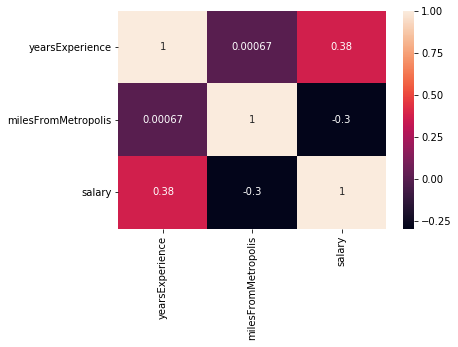

In [14]:
#check the correlation between numeric variables and the target
sns.heatmap(clean_train_df.corr(),annot=True)

We can see somewhat strong positive correlation between years of experience and salary which expected and make sense. The other correlation we see is between miles from metropolis and salary. It is a negative type of correlation and it is also expected and explainable. Cost of livivng and salaries are higher in downtowns and city centers comparing to outskirts. And there is no correlation between miles from metropolis and years of experience which make sense as well.

In [15]:
#building a plot showing relation between numeric variable and the target
def build_plot(num_var):
    average = clean_train_df.groupby(num_var)['salary'].mean()
    plt.ylabel('Salary')
    average.plot()

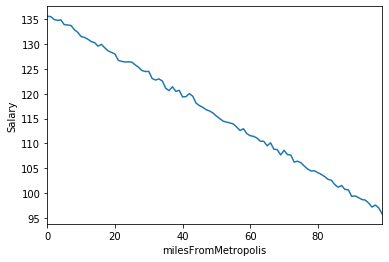

In [16]:
#relation between average salary depending on miles from metropolis
build_plot('milesFromMetropolis')

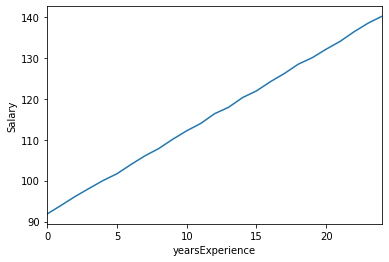

In [17]:
#relation between average salary depending on years of experience
build_plot('yearsExperience')

In [18]:
#relation between categorical variable and the target
def boxen_plot(col):
    f,ax = plt.subplots(figsize=(15,8))
    sns.boxenplot(x=col, y= 'salary', data=clean_train_df.sort_values('salary'))
    plt.xticks(rotation=90)

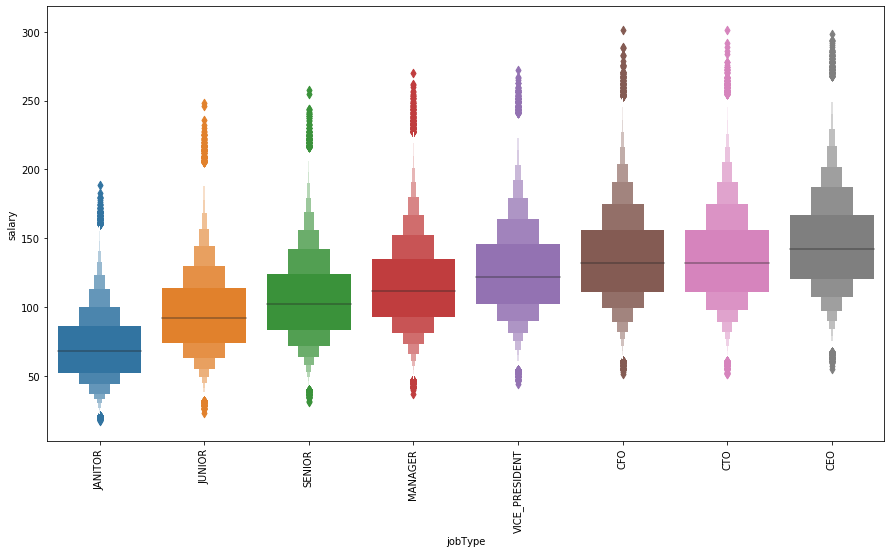

In [19]:
#distribution of salaries in different types of job
boxen_plot('jobType')

In average the highest salaries have C-suite types of top managers and the lowest average salaries have janitors and juniors as expected.

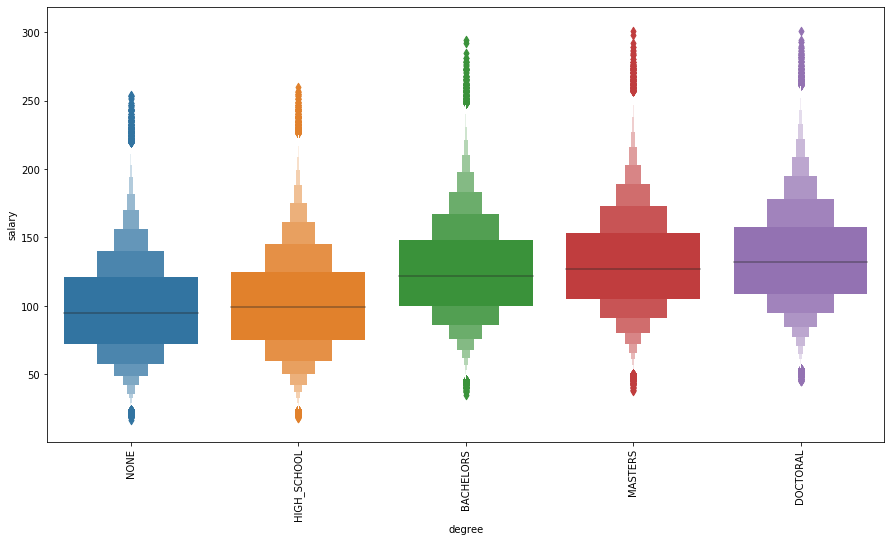

In [20]:
#distribution of salaries for each degree
boxen_plot('degree')

The higher degree is the higher is an avarage salary.

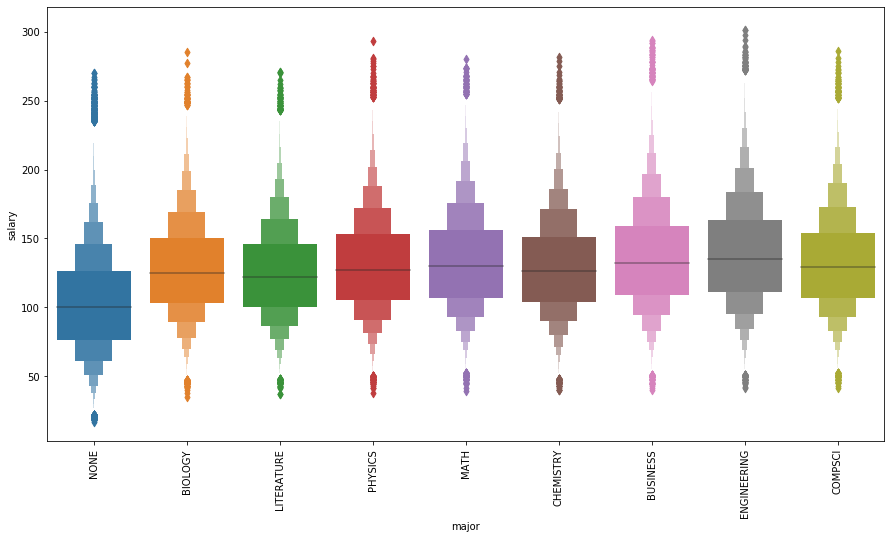

In [21]:
#distribution of salaries for majors
boxen_plot('major')

The highest avarage salaries have people with major in Engeneering and Business.

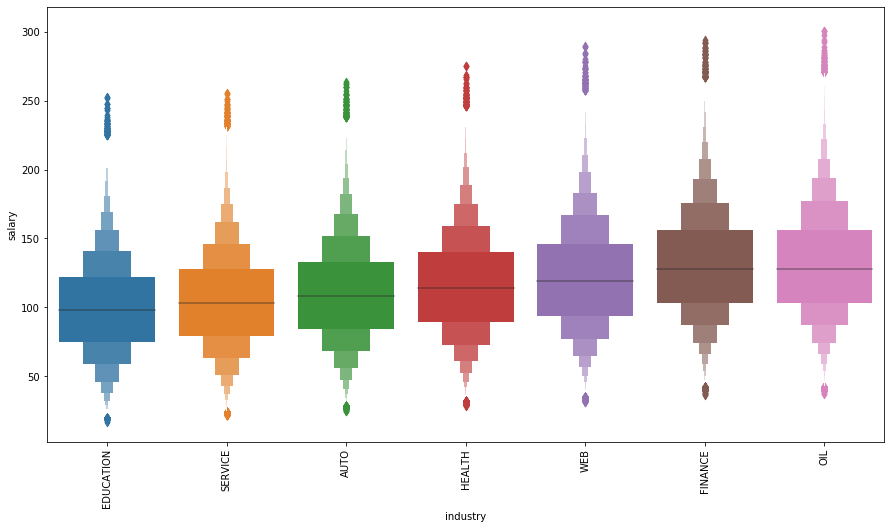

In [22]:
#distribution of salaries in different industries
boxen_plot('industry')

The highest average salaries are in Oil and Finance industries and the lowest abvarege salary is in Education system.

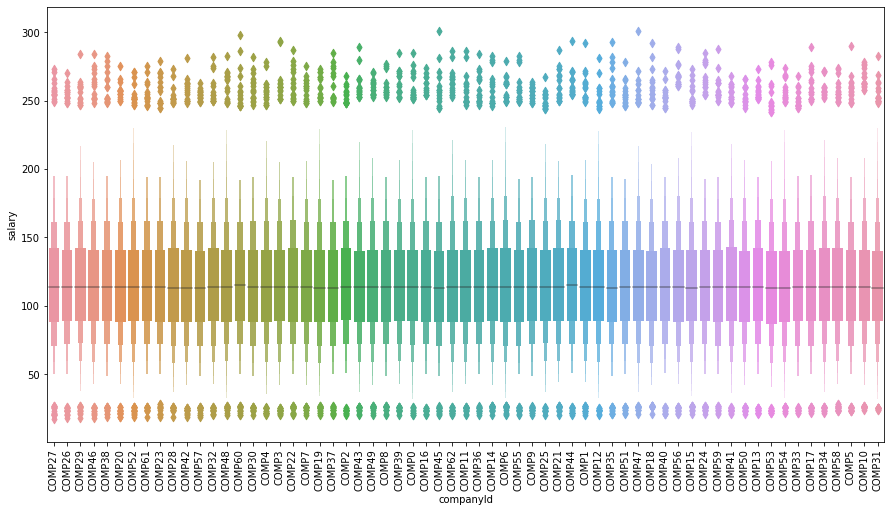

In [23]:
#distribution of salaries across companies in the dataframe
boxen_plot('companyId')

There is no any significant variance of salaries distribution across companies presented in the dataset. That means that this variable can't be a good predictor of the target.

In [24]:
#building a heat map showing relationship between two variables and the target grouped by 
#mean salary of each category
def build_heat_map(col1,col2):
    df_gptest = clean_train_df[[col1,col2,'salary']]
    grouped_test1 = df_gptest.groupby([col1,col2],as_index=False).mean()
    grouped_pivot = grouped_test1.pivot(index=col1,columns=col2)
    #fill missing values with 0
    grouped_pivot = grouped_pivot.fillna(0)
    
    fig, ax = plt.subplots()
    im = ax.pcolor(grouped_pivot, cmap='coolwarm')

    #label names
    row_labels = grouped_pivot.columns.levels[1]
    col_labels = grouped_pivot.index

    #move ticks and labels to the center
    ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
    
    #insert labels
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(col_labels, minor=False)

    #rotate label if too long
    plt.xticks(rotation=90)

    fig.colorbar(im)

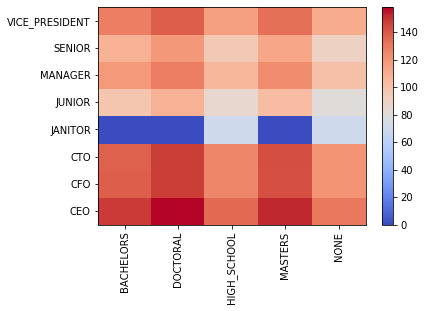

In [25]:
#look for realationship between job type and degree 
build_heat_map('jobType','degree')

The highest average salaries have people with Doctoral degree and CEO position. 

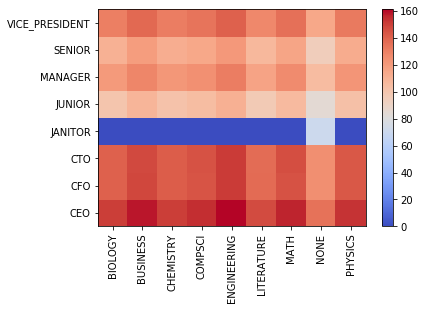

In [26]:
#look for realationship between job type and major
build_heat_map('jobType','major')

There is no significant variance across different majors. The more defying factor is a job type.

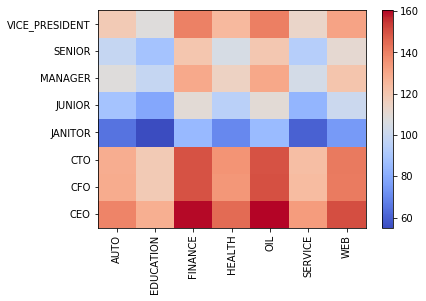

In [27]:
#look for realationship between job type and industry
build_heat_map('jobType','industry')

As can be seen from the chart there are clusters of highest avarege salaries for C-suite positions in Finance and Oil industries.

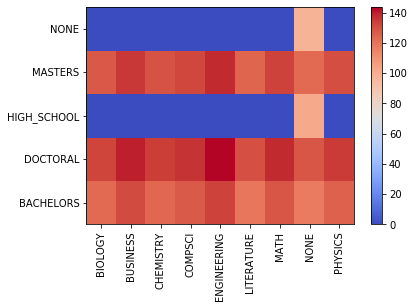

In [28]:
#look for realationship between degree and major
build_heat_map('degree','major')

People with no degree or just with high school logicly cannot have any major. This is what clearly seen from the graph. Also what is seen that there is no significant variance across different majors for people with the same degree. The highest average salary have people with Doctoral degree and Engineering major.

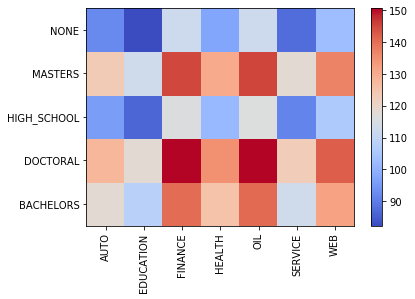

In [29]:
#look for realationship between degree and industry
build_heat_map('degree','industry')

People with a degree have the highest mean salaries in Finance and Oil industries.

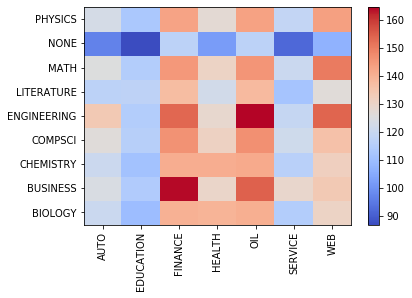

In [30]:
#look for realationship between major and industry
build_heat_map('major','industry')

There are two distinct combinations with the highest mean salaries - Business major in Finance industry and Engineering major in Oil industry. Other than that what can be seen is that industry is much stronger predictor of a salary over a major.

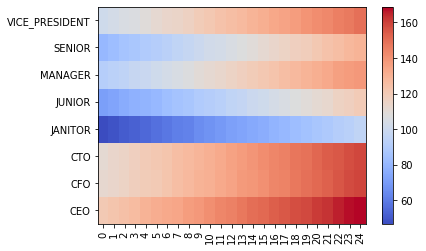

In [31]:
#look for realationship between type of job and years of experience
build_heat_map('jobType','yearsExperience')

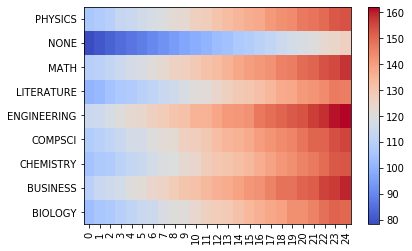

In [32]:
#look for realationship between major and years of experience
build_heat_map('major','yearsExperience')

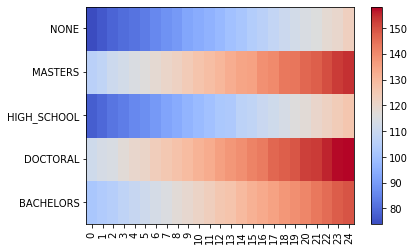

In [33]:
#look for realationship between degree and years of experience
build_heat_map('degree','yearsExperience')

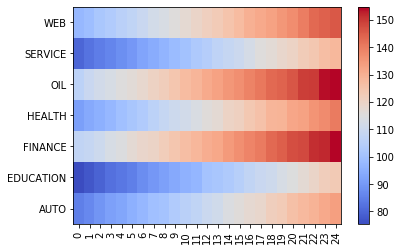

In [34]:
#look for realationship between industry and years of experience
build_heat_map('industry','yearsExperience')

In each of the last four charts there is a strong positive correlation between mean salary and years of experience regardless of industry, major, type of job and degree. It makes sence and expectable to see.

### ---- 5 Establish a baseline ----

In [35]:
#calculate industry mean for each industry and put them into a dictionary
industry_mean = clean_train_df.groupby('industry')['salary'].mean().to_dict()
industry_mean

{'AUTO': 109.43522152496485,
 'EDUCATION': 99.44838571898697,
 'FINANCE': 130.747658645164,
 'HEALTH': 115.7355399110364,
 'OIL': 130.95386285634237,
 'SERVICE': 104.44682029458984,
 'WEB': 121.6453615446388}

Finance and Oil industries not only have the highest mean salaries but they are almost the same value ~130k per year.

In [36]:
#create a simplest model by assigning to each job posting a mean salary of corresponding industry

#create a copy of the clean train data frame
ctdf_copy = clean_train_df.copy()

#create a new column named 'Industry average'
ctdf_copy['industry average'] = ''

#loop through the rows of the data frame assigning values for the new column by taking them from the dictionary
#created above and look to the first 10 rows of a new data frame
for index in range(len(ctdf_copy)):
    ctdf_copy['industry average'].values[index]=industry_mean[ctdf_copy['industry'].values[index]]
ctdf_copy.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,industry average
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115.736
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,121.645
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,115.736
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,109.435
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,130.748
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113,130.748
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,115.736
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73,99.4484
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31,99.4484
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104,109.435


In [37]:
#build a plot showing distribution of actual values vs predicted ones 
def predict_plot(test,predict):
    plt.figure(figsize=(17, 8))

    ax1 = sns.distplot(test, hist=False, color="r", label="Actual Values")
    sns.distplot(predict, hist=False, color="b", label="Predicted Values" , ax=ax1)

    plt.title('Actual vs Predicted Values for Salary')
    plt.xlabel('Salary')
    plt.ylabel('Proportion of job postings')

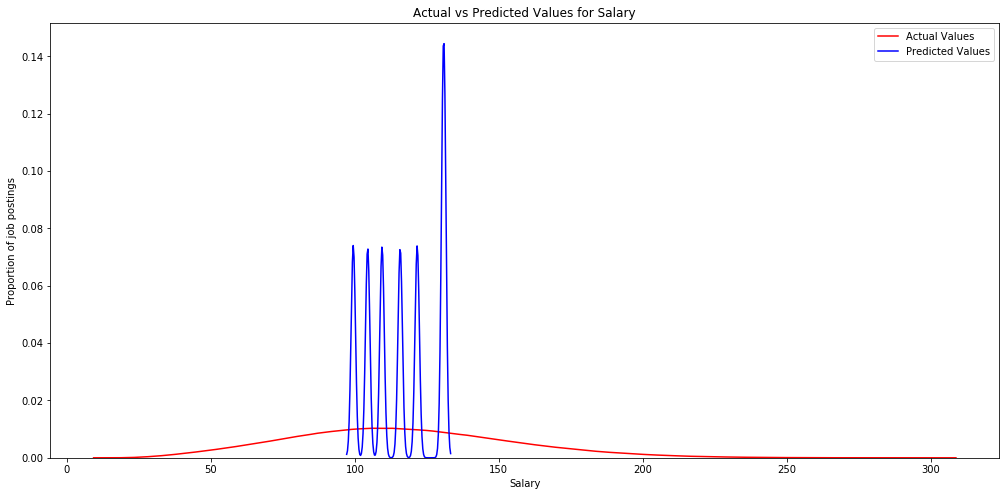

In [38]:
predict_plot(clean_train_df['salary'],ctdf_copy['industry average'])

This plot is showing how our simplest predictioning model works. Each peak represents one out of seven industries in the data set. Also is known that two industries Oil and Finance have the same mean salary so they are stacked one over another creating one high peak. Also as an additional information it is visualy seen that proportion of job postings of each industry in the data set is roughly the same. 

In [39]:
#import libraries and metrics to measure efficacy of the model
#in this case choose mean squared error as a metric
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [40]:
#create kfold object in order to split train data set in 5 equal subsets
kfold = KFold(5,True,1)
kfold

KFold(n_splits=5, random_state=1, shuffle=True)

In [41]:
#measure MSE during 5-fold cross-validation
mse = []
for train,test in kfold.split(ctdf_copy):
    mse1 = mean_squared_error(ctdf_copy['salary'].values[train],ctdf_copy['industry average'].values[train])
    print(mse1)
    mse.append(mse1)
print('MSE mean:',np.mean(mse))

1365.3357035910158
1366.4050593022566
1368.266668546412
1367.6215688859554
1367.985753600638
MSE mean: 1367.1229507852556


Now we have a baseline value for comparison and to measure efficacy of future models.

### ---- 6 Hypothesize solution ----

1. Since there is a somewhat linear relationship between numeric variables like years of experience and miles from metropolis and the target, Multiple Linear Regression can be a reasonable choise for a first predictive model. 

2. Having more than 100k observations(job postings) in the training data set and quantative target allows to choose Stochastic Gradient Descent Regressor as possibly more efficient model comparing to the Linear Regression.

3. Random Forest as one of the most commonly used algorithms provides high accuracy, handles a large proportion of data and can be used for regression tasks will be the third option for this project.

## Part 3 - DEVELOP

### ---- 7 Engineer features  ----

In [42]:
#encode variables of the dataframe, get dummies for categorical variables and concatenate with the numeric variables
def feat_encode(dataframe):
    cat_feat = ['jobType','degree','major','industry']
    num_feat = dataframe[['yearsExperience','milesFromMetropolis']]
    
    category_var = pd.get_dummies(dataframe[cat_feat])
        
    dataframe.drop(cat_feat,axis=1,inplace=True)
    return pd.concat([category_var,num_feat],axis=1)

In [43]:
#get features and a target for modeling
features = feat_encode(ctdf_copy)
target = clean_train_df['salary']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#split the data set into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25,random_state=42)

### ---- 8 Create models ----

### Multiple Linear Regression

In [46]:
#import needed libraries
from sklearn.linear_model import LinearRegression

In [47]:
#create linear regression object
mlr = LinearRegression()
mlr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#fit the train data set to a multi linear model
mlr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
#get predicted values
Y_hat = mlr.predict(X_test)

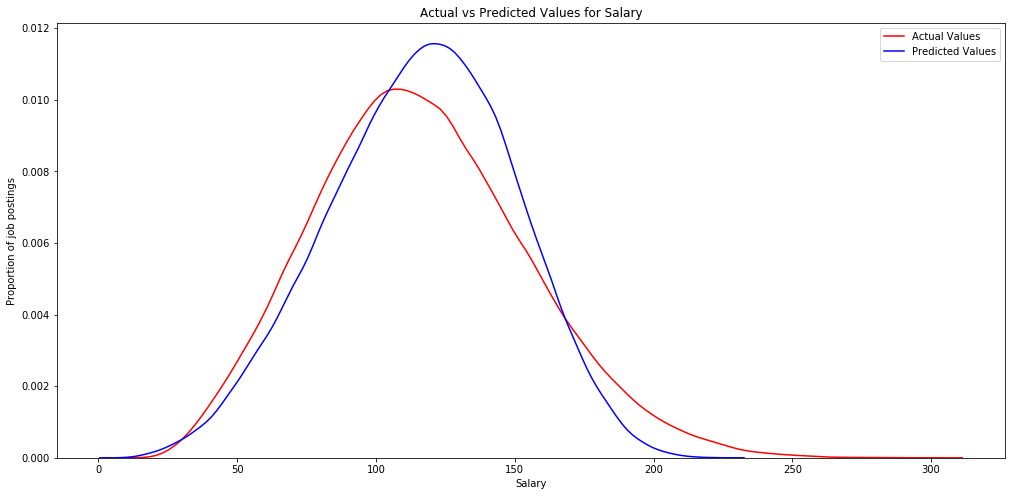

In [50]:
#build a plot for actual vs predicted values
predict_plot(y_test, Y_hat)

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
#calculate Mean Squared Error during 5-fold cross-validation
def mse_calc(model):
    mean_mse = -1.00*cross_val_score(model,features, target,cv=5,scoring='neg_mean_squared_error')
    print('MSE:',np.mean(mean_mse))

In [53]:
#calculate MSE
mse_calc(mlr)

MSE: 384.4207475563216


### SGD Regressor

In [54]:
#import needed libraries 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

In [55]:
#suppress some non-critical warnings
import warnings
from sklearn.exceptions import DataConversionWarning,ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [56]:
#set hyperparameters for the grid search 
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],}

In [57]:
#Since SGD regressor is sensitive to feature scaling, scaling the data is recommended
#In order to prevent data leakage during 5-fold cross validation after scaling it can be done using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [58]:
#create a pipeline object with best hyperparameters found during grid search
clf = make_pipeline(StandardScaler(),GridSearchCV(SGDRegressor(),param_grid,cv=5,n_jobs=-1,
                                                       scoring='neg_mean_squared_error',refit=True))

In [59]:
#fit the data to pipeline and get predicted values
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

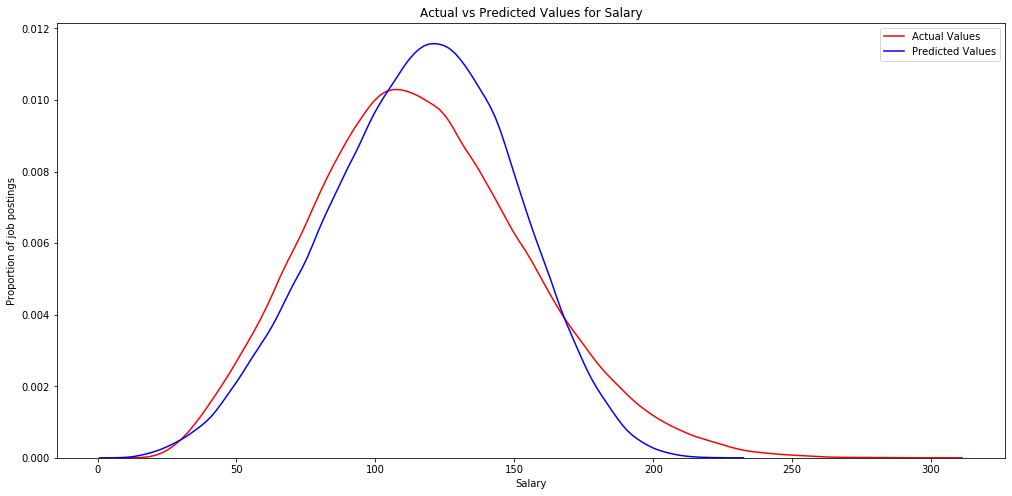

In [60]:
#build a plot actual vs predicted values
predict_plot(y_test, predict)

In [61]:
#calculate MSE
print('MSE:',mean_squared_error(y_test, predict))

MSE: 384.59260300124174


There is no improvement in decreasing MSE compering with Multiple Linear Regression

### Random Forest

In [62]:
#import needed library
from sklearn.ensemble import RandomForestRegressor

In [63]:
#create a Random Forest object with hyperparameters tuned prior by hand 
rfr = RandomForestRegressor(n_estimators=60,max_depth=25, min_samples_split=60,max_features='auto',n_jobs=-1)

In [64]:
#fit data to the model
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
#get predicted values
predict = rfr.predict(X_test)

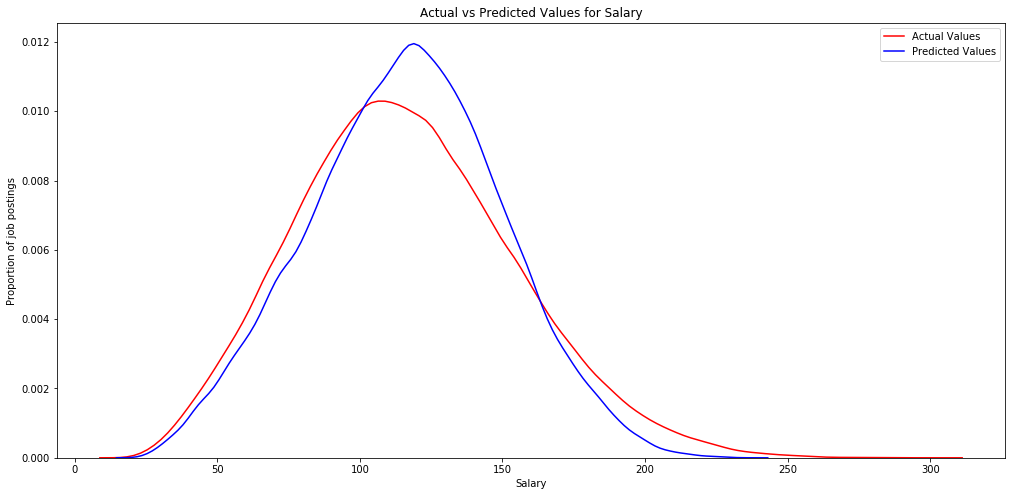

In [66]:
#build a plot actual vs predcted values
predict_plot(y_test, predict)

In [67]:
#calculate MSE
mse_calc(rfr)

MSE: 366.2576177990552


There is a significant improvement in reducing  MSE over previous algorithms.

### ---- 9 Select best model  ----

The model built by a Random Forest algorithm has the lowest MSE among other ones tested on this data set. Thus this model is going to be a production model.

## Part 4 - DEPLOY

### ---- 10 Automate pipeline ----

In [68]:
#import pickle module to save a model
import pickle

In [69]:
#assign chosen algorithm and its hyperparameters for the model
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=60,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [70]:
#train model on entire training set
model.fit(features,target) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
#give a name for the file to store the model
filename = 'Finalized_model.pkl'

In [72]:
#save the model to a file
with open(filename,'wb') as file:
    pickle.dump(model,file)

In [73]:
#load the model from the file
with open(filename,'rb') as file:
    loaded_model = pickle.load(file)

In [74]:
#get the score for the loaded model
score  = loaded_model.score(features,target)
print('Test score:', score)

Test score: 0.7844922260547207


In [75]:
#encode features from the test data set and get predicted values of salaries
test_feat = feat_encode(test_features)
Predictions = loaded_model.predict(test_feat)

### ---- 12 Deploy solution ----

In [76]:
#save predictions to csv file
Predictions = pd.DataFrame(Predictions,columns=['Predictions'])
Predictions.to_csv('Predictions.csv')

In [77]:
#get summary of the predicted values
Predictions.describe()

,Predictions
count,1000000.000000
mean,116.057842
std,33.751085
min,23.233092
25%,92.854995
50%,116.594148
75%,139.250258
max,236.363515


In [78]:
#save summary of predictions to a file
Predictions.describe().to_csv('Predictions Summary.csv')

Text(0, 0.5, 'Proportion of job postings')

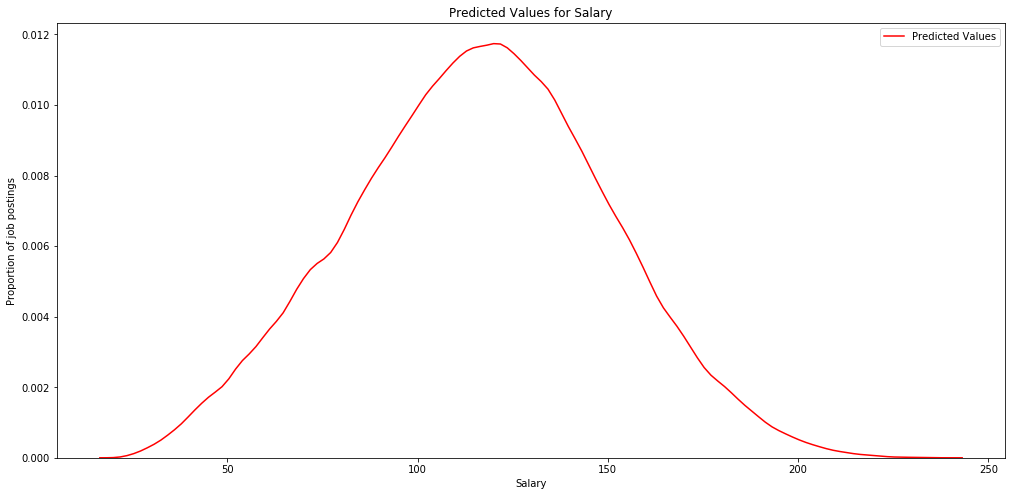

In [79]:
#build a plot of distribution of predicted values
plt.figure(figsize=(17, 8))

Prediction_plot = sns.distplot(Predictions, hist=False, color="r", label="Predicted Values")

plt.title('Predicted Values for Salary')
plt.xlabel('Salary')
plt.ylabel('Proportion of job postings')

In [80]:
#save the plot to a file
fig = Prediction_plot.get_figure()
fig.savefig('Prediction_plot.png')

In [81]:
#get feature importances,save them to a dataframe and sort them in a descending order
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature':features.columns,'importance':importances})
feature_importances.sort_values(by='importance',ascending=False,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

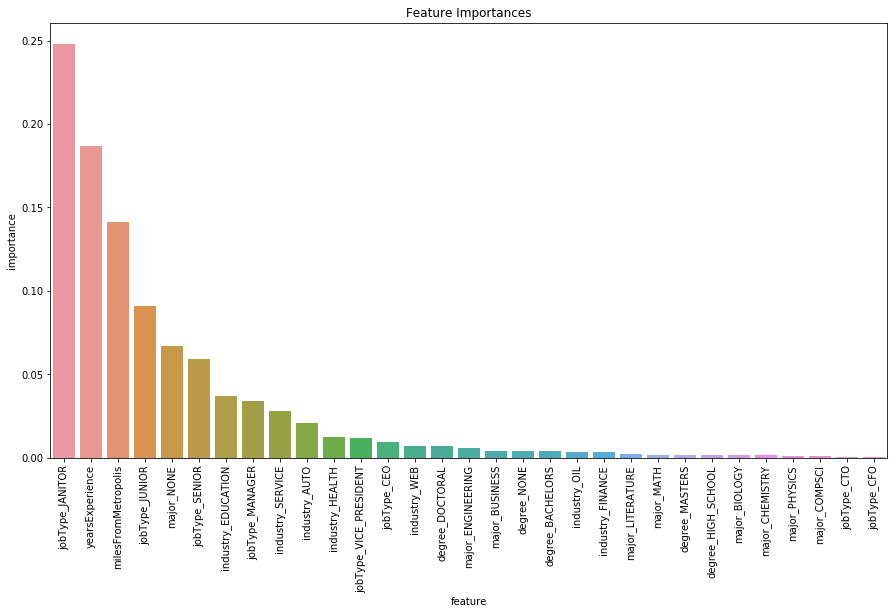

In [82]:
#build a plot visualzing feature importances
f, ax = plt.subplots(figsize=(15,8))
Feature_Importances = sns.barplot(x='feature',y='importance',data=feature_importances)
plt.title('Feature Importances')
plt.xticks(rotation=90)

In [83]:
#save the plot into a file
fig = Feature_Importances.get_figure()
fig.savefig('Feature_Importances_plot.png')

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data